In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import torch
from torch.utils.data import TensorDataset, DataLoader

In [2]:
df = pd.read_csv("imputed_data_final.csv")
df = df[df.columns[4:]]
df.head(5)

Year       EVI      Height       HSUS  Immigration  Life Expectancy  \
0  1782  25.27862  173.108454  19.258893     1.496999        55.768842   
1  1784  25.27862  173.063703  19.004489     1.496999        56.035361   
2  1787  25.27862  172.974200  19.098354     1.496999        56.071185   
3  1788  25.27862  172.929448  18.675441     1.496999        56.126853   
4  1791  26.45349  172.892156  18.544447     1.566766        56.063206   

   Polarization  Wage GDP Ratio  fatalities  riot_economic  ...  ne_count  \
0      0.371811        1.090890         1.0              0  ...         0   
1      0.371811        1.090890         9.0              4  ...         0   
2      0.371811        1.090890        20.0              0  ...         0   
3      0.371811        1.091615         3.0              0  ...         0   
4      0.532692        1.146261         1.0              1  ...         0   

   ok_count  hi_count  sd_count  nd_count  ia_count  ak_count  NA_count  \
0         0         0         0         0         0         0         0   
1         0         0         0         0         0         0         0   
2         0         0         0         0         0         0         0   
3         0         0         0         0         0         0         0   
4         0         0         0         0         0         0         0   

     Population  Political Instability  
0  2.970621e+06              -1.088771  
1  3.188095e+06               1.143161  
2  3.553406e+06               2.099389  
3  3.677840e+06               2.163410  
4  4.056153e+06               1.777819  

[5 rows x 145 columns]

In [3]:
state_list = ['NC', 'PA', 'TN', 'TX', 'AL', 'AR', 'GA', 'IL', 'KY', 'LA', 'MS', 'SC']
state_list = [val.lower() for val in state_list]
state_list = [state + "_count" for state in state_list]
type_subtype = ["riot_labor","riot_political","riot_race","lynching_extralegal","lynching_political","lynching_race","rampage_education","rampage_political","rampage_race"]

In [4]:
df["weighted_states"] = df[state_list].sum(axis = 1)

In [5]:
df["Num_Locations"] = df[df.columns[91:143]].astype(bool).sum(axis=1)

In [6]:
df["type_subtype_sum"] = df[type_subtype].sum(axis = 1)

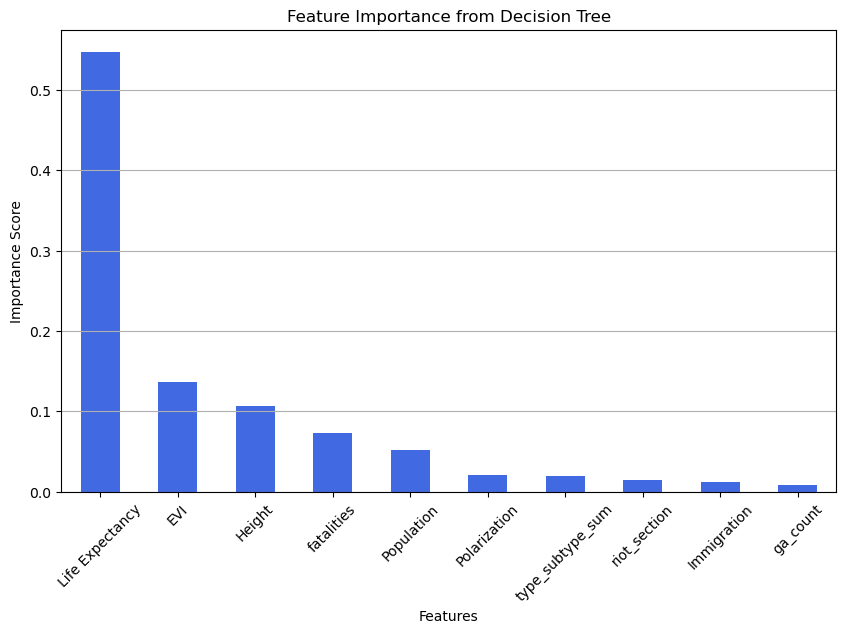

Top 3 Features: ['Life Expectancy', 'EVI', 'Height']


In [7]:
df = df.select_dtypes(include=[np.number]).dropna()
X = df.drop(columns=["Political Instability"])
y = df["Political Instability"]


dtree = DecisionTreeRegressor(
    max_depth=5,  # Limit depth to avoid overfitting
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)
dtree.fit(X.drop(["Year"],axis = 1), y)

feature_importance1 = pd.Series(dtree.feature_importances_, index=X.drop(["Year"],axis = 1).columns).sort_values(ascending=False)
top_features = feature_importance1.head(10)

plt.figure(figsize=(10, 6))
top_features.plot(kind='bar', color='royalblue')
plt.title("Feature Importance from Decision Tree")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

# Select the top 5 features
top_3_features = top_features.head(3).index.tolist()
print("Top 3 Features:", top_3_features)



In [10]:
df_feature1 = feature_importance1.reset_index()
index_val = list(df_feature1[:40]["index"])

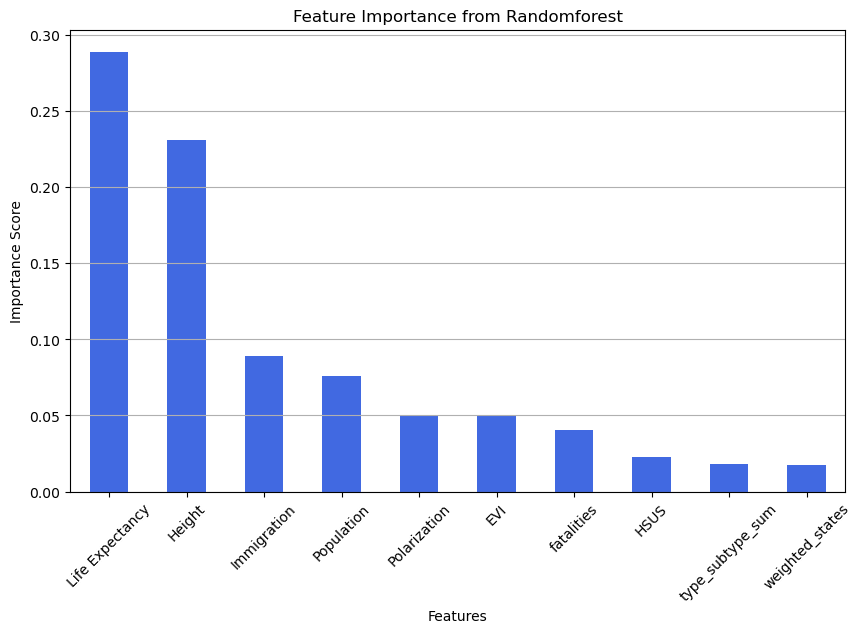

In [12]:
from sklearn.ensemble import RandomForestRegressor as rnd_frst
from sklearn.model_selection import cross_val_score, \
                                    LeaveOneOut, RepeatedKFold
from sklearn.metrics import mean_squared_error, roc_curve, auc, \
                            f1_score    

model = rnd_frst(max_depth=5, n_estimators=100, random_state = 42)
#k_folds = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)
#scores = cross_val_score(model, X_train, y_train, 
                    # scoring='neg_mean_squared_error',
                    # cv=k_folds, n_jobs=None) 
                           



model.fit(X.drop(["Year"],axis=1), y)

feature_importance2 = pd.Series(model.feature_importances_, index=X.drop(["Year"],axis = 1).columns).sort_values(ascending=False)
top_features = feature_importance2.head(10)

plt.figure(figsize=(10, 6))
top_features.plot(kind='bar', color='royalblue')
plt.title("Feature Importance from Randomforest")
plt.ylabel("Importance Score")
plt.xlabel("Features")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.show()

In [13]:
df_feature2 = feature_importance2.reset_index()
index_val2 = list(df_feature2[:40]["index"])

In [14]:
features = list(set(index_val).intersection(set(index_val2)))

In [15]:
from sklearn.decomposition import PCA

In [16]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[features])

In [17]:
df2 = pd.DataFrame(scaled_features)

In [18]:
for i in range(len(df2.columns)):
    df2 = df2.rename({i:features[i]},axis = 1)

In [19]:
df2["Political Instability"] = df["Political Instability"]

In [20]:
df2

riot_section, race  fatalities  riot_labor  Life Expectancy  \
0             -0.137309   -0.346788   -0.436753         0.475214   
1             -0.137309   -0.306140   -0.436753         0.538631   
2             -0.137309   -0.250248   -0.436753         0.547155   
3             -0.137309   -0.336626   -0.436753         0.560401   
4             -0.137309   -0.346788   -0.436753         0.545257   
..                  ...         ...         ...              ...   
188           -0.137309   -0.235005   -0.436753         1.079789   
189           -0.137309   -0.209600   -0.436753         1.079789   
190           -0.137309   -0.036845   -0.436753         1.079789   
191           -0.137309    0.374530   -0.436753         1.079789   
192           -0.137309   -0.097817   -0.436753         1.079789   

     type_subtype_sum       EVI  Immigration  riot_race  Polarization  \
0           -0.652637 -0.941860    -2.022672  -0.504784     -1.642954   
1           -0.526678 -0.941860    -2.022672  -0.504784     -1.642954   
2           -0.274760 -0.941860    -2.022672  -0.504784     -1.642954   
3           -0.652637 -0.941860    -2.022672  -0.219085     -1.642954   
4           -0.778596 -0.939850    -2.005298  -0.504784     -0.644674   
..                ...       ...          ...        ...           ...   
188         -0.778596  0.708684     0.557924  -0.504784      1.949369   
189         -0.526678  0.731203     0.557924  -0.504784      1.999512   
190         -0.400719  0.755938     0.557924  -0.504784      2.048350   
191          1.236747  0.785012     0.557924  -0.504784      2.095826   
192          0.229075  0.784980     0.557924  -0.504784      2.085749   

     riot_race, political  riot_military  ga_count    Height  riot_section  \
0                -0.16858      -0.170377 -0.331021 -0.229265     -0.207453   
1                -0.16858      -0.170377 -0.331021 -0.244490     -0.207453   
2                -0.16858      -0.170377 -0.331021 -0.274940     -0.207453   
3                -0.16858      -0.170377 -0.331021 -0.290165     -0.207453   
4                -0.16858      -0.170377 -0.331021 -0.302853     -0.207453   
..                    ...            ...       ...       ...           ...   
188              -0.16858      -0.170377 -0.331021  0.987801     -0.207453   
189              -0.16858      -0.170377 -0.331021  0.987801     -0.207453   
190              -0.16858      -0.170377 -0.331021  0.987801     -0.207453   
191              -0.16858      -0.170377  0.219729  0.987801     -0.207453   
192              -0.16858      -0.170377  0.219729  0.987801     -0.207453   

     riot_race, labor  Population      HSUS  lynching_race  \
0           -0.170377   -1.205319 -1.442408      -0.474774   
1           -0.170377   -1.202907 -1.477072      -0.474774   
2           -0.170377   -1.198855 -1.464283      -0.474774   
3           -0.170377   -1.197474 -1.521907      -0.474774   
4           -0.170377   -1.193278 -1.539756      -0.474774   
..                ...         ...       ...            ...   
188         -0.170377    2.076413  1.023952      -0.474774   
189         -0.170377    2.105305  1.023952      -0.474774   
190         -0.170377    2.133254  1.023952      -0.474774   
191         -0.170377    2.160259  1.023952      -0.474774   
192         -0.170377    2.186320  1.023952      -0.474774   

     Political Instability  
0                -1.088771  
1                 1.143161  
2                 2.099389  
3                 2.163410  
4                 1.777819  
..                     ...  
188              -0.840085  
189              -1.017228  
190              -0.617034  
191              -0.041424  
192              -0.009053  

[193 rows x 19 columns]

In [41]:
model = PCA(n_components=3)
X = model.fit_transform(df2.drop(["Political Instability"],axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [44]:
X_new = df[["Life Expectancy","EVI","Height"]]
X_new = scaler.fit_transform(X_new)
y = df["Political Instability"]
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, random_state=12)

In [47]:
model = PCA(n_components=3)
X_pca = model.fit_transform(df.drop(["Year","Political Instability"],axis = 1))
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=12)

In [48]:
models = [RandomForestRegressor(n_estimators=100, random_state=42), GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),LassoCV(alphas=np.logspace(-3, 3, 10), cv=5,max_iter=10000)]

In [49]:
for model_val in models:
    model_val.fit(X_train, y_train)
    y_pred = model_val.predict(X_test)

    mse_rf = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred) 
    print(mse_rf,r2, mae)

0.2754753706349002 0.8640106938523852 0.371002219912968
0.26440997878398276 0.869473160266677 0.37729061618720866
1.3776891801051694 0.3198992880641842 0.8378727185203928
